In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn 

In [2]:
EmotionsDF = pd.read_csv(r"C:\Users\JackT\CodeLancs\Andre\Datasets\Emotions Kaggel Dataset.csv") 


In [3]:
EmotionsDF

# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). This was on the dataset info.

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [4]:
# Renaming the column 'label'.
EmotionsDF = EmotionsDF.rename(columns={'label': 'Emotion_Label'})  
Sadness = 0
Joy = 1
Love = 2
Anger = 3
Fear = 4
Surprise = 5

# Filtering the DataFrame to only include rows with the specific label.
Joy_Filter = EmotionsDF[EmotionsDF['Emotion_Label'] == Joy]

# Select a random row (segment) from the filtered DataFrame.
random_segment = Joy_Filter.sample(n=3)

# Prints a random segment.
print(random_segment)

        Unnamed: 0                                               text  \
325752      325752  i feel that her apology is sincere and she gen...   
140839      140839  im feeling more eager than ever to claw back w...   
282714      282714  i ling and us were the second which i am feeli...   

        Emotion_Label  
325752              1  
140839              1  
282714              1  


In [13]:
# Don't run!

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'text' column contains the textual data and 'label' contains the emotion labels
X = EmotionsDF['text']
y = EmotionsDF['Emotion_Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a text processing and machine learning pipeline
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    SVC(kernel='linear')
)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

In [5]:
#Splits the data into training data and testing data
from sklearn.model_selection import train_test_split  

#TfidfVectorizer is used to convert a collection of raw documents to a matrix of TF-IDF features. 
#TF (Term Frequency) is the number of times a word appears in a document, divided by the total number of words in that document.
#IDF (Inverse Document Frequency) is the log of the number of documents divided by the number of documents that contain the word.
from sklearn.feature_extraction.text import TfidfVectorizer

#LinearSVC is a tool used for making decisions by dividing different categories with a straight line (hence the term 'linear').
from sklearn.svm import LinearSVC

#From sklearn.pipeline import make_pipeline is importing a function that helps to organize and streamline a sequence of data processes in the code.
from sklearn.pipeline import make_pipeline
#Classification_report gives you a summary of how well your model is doing. accuracy_score tells you what percent of the predictions your model made are correct.
from sklearn.metrics import classification_report, accuracy_score

# Assigning columns to X and Y.
X = EmotionsDF['text']
y = EmotionsDF['Emotion_Label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a text processing and machine learning pipeline.
# Think recipe in a cookbook.
# Max features why was why the previous attempt at tis didn't work.
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english', max_features=500),  
    LinearSVC()
)

# Training the model
pipeline.fit(X_train, y_train)

# Predictions.
y_pred = pipeline.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

c:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.76      0.79     24201
           1       0.68      0.89      0.77     28164
           2       0.74      0.52      0.61      6929
           3       0.88      0.68      0.77     11441
           4       0.82      0.65      0.72      9594
           5       0.76      0.63      0.69      3033

    accuracy                           0.76     83362
   macro avg       0.78      0.69      0.73     83362
weighted avg       0.77      0.76      0.75     83362

Accuracy: 0.76


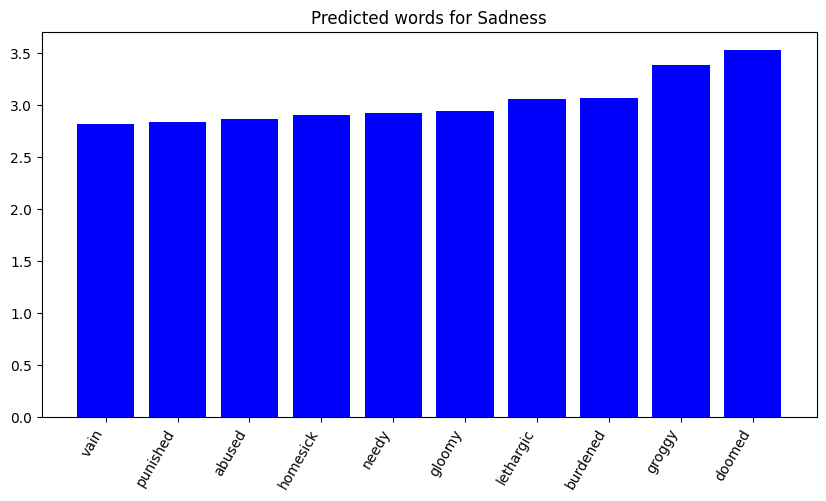

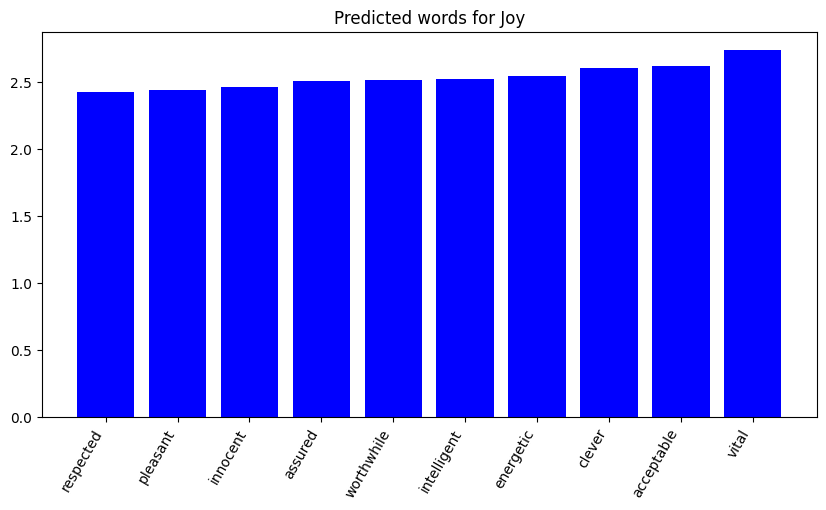

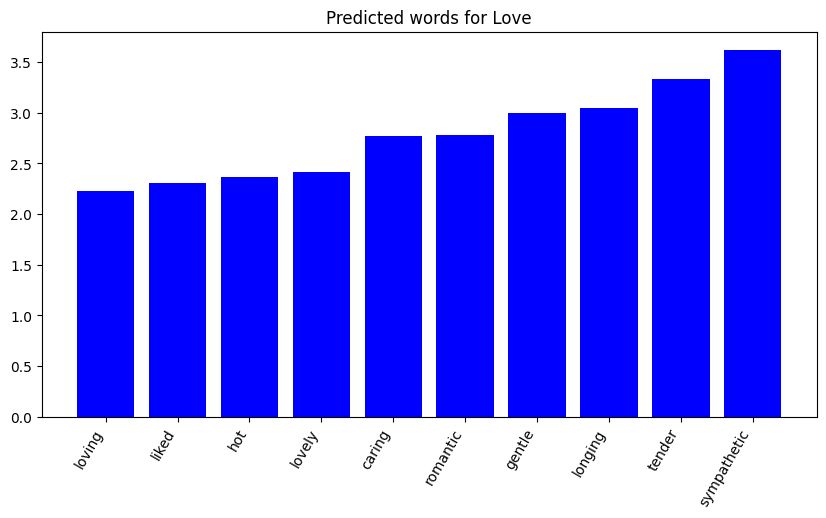

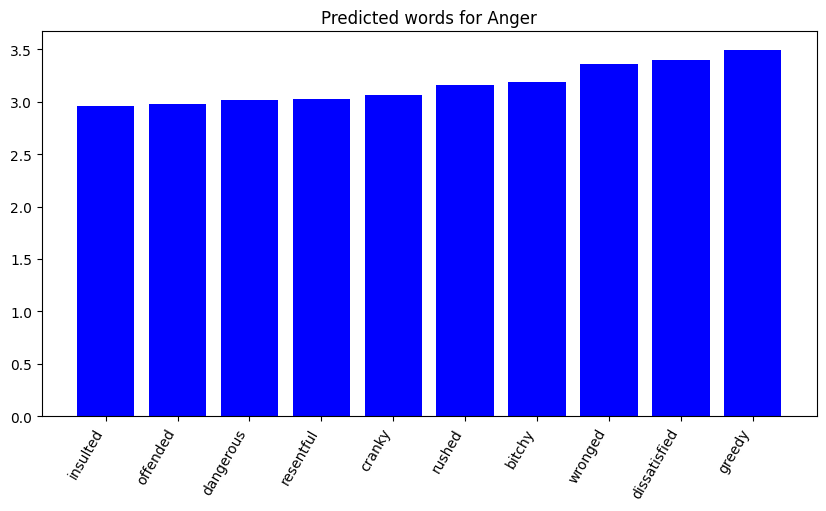

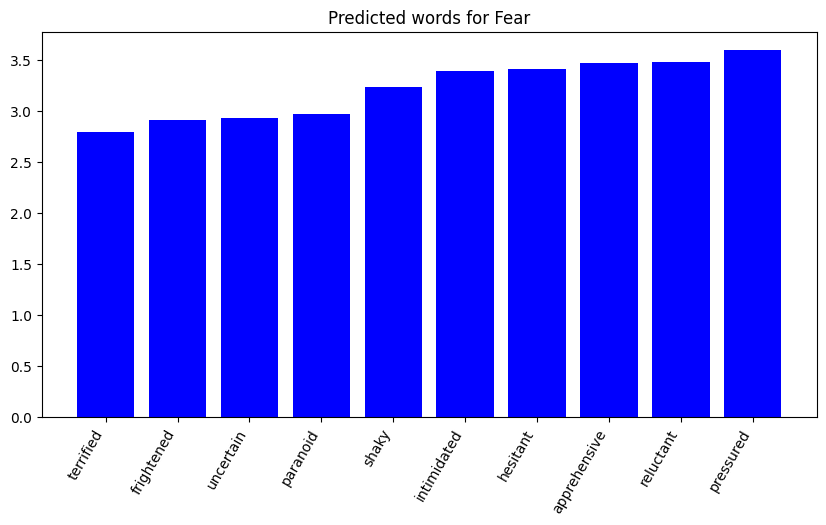

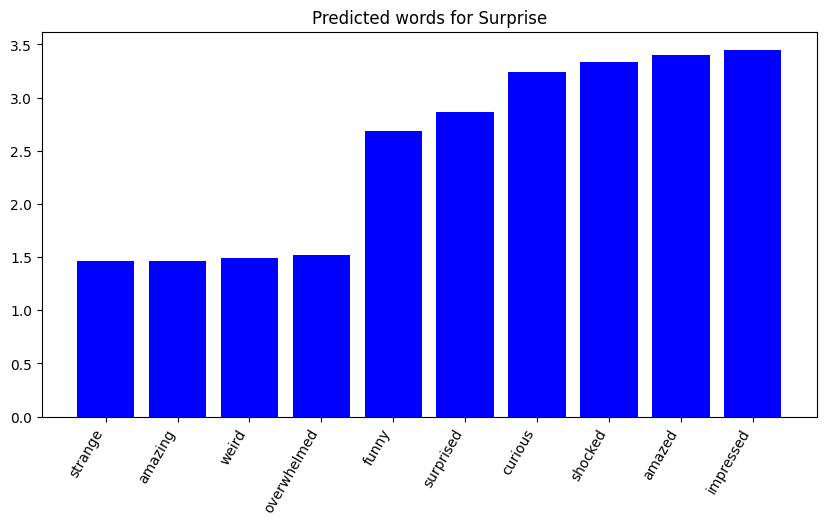

In [6]:
# Extracting the TfidfVectorizer and LinearSVC from the pipeline.
# This line is getting a tool (TfidfVectorizer) from the pipeline that turns text into numbers in a meaningful way.
vectorizer = pipeline.named_steps['tfidfvectorizer']
# This line is getting the actual machine learning model (LinearSVC) from the pipeline that uses those numbers to make predictions.
model = pipeline.named_steps['linearsvc']

# Get the feature names and coefficients
# This line is getting the names of the features that the TfidfVectorizer has learned from the text.
# This line is getting the names of the features (the individual measurable properties or characteristics of the phenomena being observed) that the TfidfVectorizer has learned from the text.
feature_names = vectorizer.get_feature_names_out()

# This line is getting the learned weights (co-efficents) from the LinearSVC model. These weights are used by the model to make predictions.
# Coefficients are how important each of those words or phrases are in making a decision.
# Think how much weight they hold.
coefficients = model.coef_

# This is just a list of titles that will be used for the bar charts.
custom_titles = [
    'Predicted words for Sadness',
    'Predicted words for Joy',
    'Predicted words for Love',
    'Predicted words for Anger',
    'Predicted words for Fear',
    'Predicted words for Surprise',
]

    # This line starts a loop that will create a bar chart for each emotion.
for i, label in enumerate(pipeline.classes_):
    
    # argsort returns coeeficients in the array by their index.
    sorted_indices = np.argsort(coefficients[i])

    # Top positive coefficients as predictors for the label due to the previous ascedning sort order.
    top_positive_coefficients = sorted_indices[-10:]

    # Plotting the graphs
    plt.figure(figsize=(10, 5))
    colors = ['red' if c < 0 else 'blue' for c in coefficients[i][top_positive_coefficients]]
    plt.bar(np.arange(10), coefficients[i][top_positive_coefficients], color=colors)
    feature_names_top = np.array(feature_names)[top_positive_coefficients]
    plt.xticks(np.arange(0, 10), feature_names_top, rotation=60, ha='right')
    
    # Sets the custom title from the list using index i
    plt.title(custom_titles[i])
    
    plt.show()